# Diabetes Prediction 

## 1. Introduction

Diabetes is one of the most common and hazardous diseases on the planet. It requires a lot of care and proper medication to keep the disease in control. In this data mining project, we will use the provided diabetes to train and evaluate our model with various classification approaches. At the end of the experiment, we will conclude which classifier is best suited for diabetes predication. 

## 2. Data Preprocessing 

In [1]:
# Import the diabetes data
import pandas as pd 
df = pd.read_csv("diabetes.csv")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
X, y = df.drop("Outcome",axis=1), df["Outcome"]

In [3]:
# Data Split for training (70%)/ testing (30%) and shuffle once before splitting. A value is assigned to random_state so as everytime this code is run, the data in partition would be the same data. It is machine dependent.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1) 

Diabetes dataset has 8 features: (Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, DiabetesPedigreeFunction and Age) and 2 classes: 1 being Diabetes and 0 being No Diabetes. There are a total of 768 observations and we used a 70/30 split to train and validate our models. Therefore, our training dataset has 537 observations with 183 Yes Diabetes and 354 No Diabetes. 

#### Training Data Analysis
There are more negative diabetes than positive diabetes. Training data is unbalanced and skewed to one side. When we train with unbalanced data, our model would overfit to negative diabetes records. This is undesirable as our model would produce False Negative cases more and we don't want that since this is about detecting whether a patient has diabetes. It is better to have more False Positives than False Negative which is a patient having diabetes without any detection. In any cases, it would be better to re-sample the training data. 

In [4]:
from sklearn.utils import resample
trainData = pd.concat([X_train, y_train], axis=1) # combine the X_train and y_train back
trainData.shape # total size of train data

(537, 9)

In [5]:
yes_diabetes = trainData[trainData.Outcome==1] # how many is yes
no_diabetes = trainData[trainData.Outcome==0] # how many is no
print("Yes Diabetes: ",yes_diabetes.shape)
print("No Diabetes: ", no_diabetes.shape)

Yes Diabetes:  (183, 9)
No Diabetes:  (354, 9)


### Resampling

#### Oversampling

In [6]:
from sklearn.utils import resample
# Supply the "Yes Diabetes" samples to match the number of "No Diabetes" 
yes_diabetes_up = resample(yes_diabetes, replace=True, n_samples=len(no_diabetes), random_state=1)
print("Yes Diabetes: ",yes_diabetes_up.shape)
print("No Diabetes: ", no_diabetes.shape)

Yes Diabetes:  (354, 9)
No Diabetes:  (354, 9)


In [7]:
trainDataUp = pd.concat([yes_diabetes_up, no_diabetes])
trainDataUp.shape # total size of train up data

(708, 9)

In [8]:
X_train_up, y_train_up = trainDataUp.drop("Outcome",axis=1), trainDataUp["Outcome"]
print(X_train_up.shape)
print(y_train_up.shape)

(708, 8)
(708,)


#### Undersampling

In [9]:
from sklearn.utils import resample
# Cut the "No Diabetes" samples to match the number of "Yes Diabetes"
no_diabetes_down = resample(no_diabetes, n_samples=len(yes_diabetes), random_state=1) 
print("Yes Diabetes: ",yes_diabetes.shape)
print("No Diabetes: ", no_diabetes_down.shape)

Yes Diabetes:  (183, 9)
No Diabetes:  (183, 9)


In [10]:
trainDataDown = pd.concat([yes_diabetes, no_diabetes_down])
trainDataDown.shape # total size of train down data

(366, 9)

In [11]:
X_train_down, y_train_down = trainDataDown.drop("Outcome",axis=1), trainDataDown["Outcome"]
print(X_train_down.shape)
print(y_train_down.shape)

(366, 8)
(366,)


## 3. Classification Models

For Evaluating Model:

In [12]:
# Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks
def printModelEvaluation(actual, pred):
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    print(ConfusionMatrixDisplay(confusion_matrix(actual,pred)).plot())
    #print(confusion_matrix(actual,pred))
    print(classification_report(actual,pred))

For Paramters Tuning:

In [13]:
# Grid Search CV to find the optimal parameters
def gridSearch(estimator, hyper_params, cv, scoring, Xtrain, ytrain):
    from sklearn.model_selection import GridSearchCV
    gcv = GridSearchCV(estimator = estimator, param_grid= hyper_params, refit = True, cv=cv, verbose = 0,n_jobs=-1,scoring=scoring).fit(Xtrain, ytrain)
    print("GCV best params: ", gcv.best_params_) # print best parameter after tuning 
    return gcv

### 3.1 Support Vector Machine Classification

Support Vector Machine (SVM) is one of the most popular supervised learning classifier. The objective of SVM is to find the hyperplane with the largest margin, which would distinctly classified the data in  an N-dimensional space. We chose this classifier for diabetes dataset as we have not had a practice of SVM implementation with sklearn before and it would be interesting to observe SVM would differ from other classifiers.

#### Linear Kernel

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.59      0.67        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



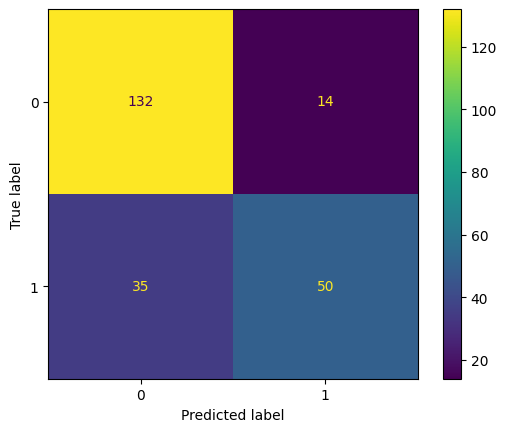

In [216]:
# train the model 
from sklearn.svm import SVC
linearSVC = SVC(kernel='linear', C=10) # Linear Kernel
linearSVC.fit(X_train, y_train)
printModelEvaluation(y_test,linearSVC.predict(X_test))

#### Non-Linear Kernel

#####  1. Polynomial Kernel

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       146
           1       0.86      0.51      0.64        85

    accuracy                           0.79       231
   macro avg       0.81      0.73      0.74       231
weighted avg       0.80      0.79      0.77       231



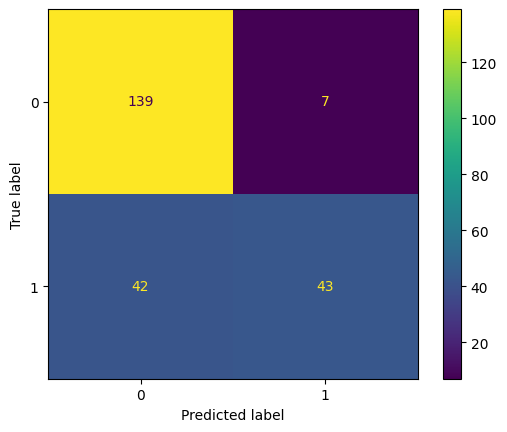

In [217]:
from sklearn.svm import SVC
poly = SVC(kernel='poly',)
poly.fit(X_train, y_train)
printModelEvaluation(y_test,poly.predict(X_test))

##### 2. Gaussian Kernel

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       146
           1       0.83      0.47      0.60        85

    accuracy                           0.77       231
   macro avg       0.79      0.71      0.72       231
weighted avg       0.78      0.77      0.75       231



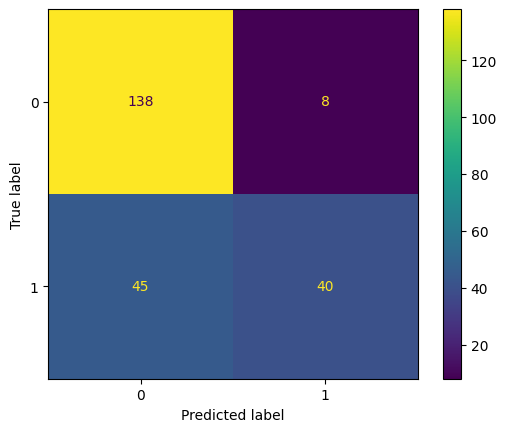

In [222]:
from sklearn.svm import SVC
rbf = SVC(kernel='rbf')
rbf.fit(X_train, y_train)
printModelEvaluation(y_test,rbf.predict(X_test))

##### 3. Sigmoid Kernel

              precision    recall  f1-score   support

           0       0.56      0.71      0.62       146
           1       0.07      0.04      0.05        85

    accuracy                           0.46       231
   macro avg       0.31      0.37      0.33       231
weighted avg       0.38      0.46      0.41       231



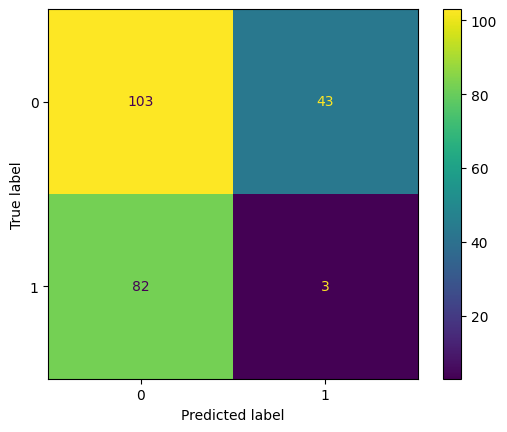

In [223]:
from sklearn.svm import SVC
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
printModelEvaluation(y_test,sigmoid.predict(X_test))

#### Parameters Tuning

SVM Goals: 
(1) Increase the distance of decision boundary to classes (or support vectors)
(2) Maximize the number of points that are correctly classified in the training set

There is a trade off between (1) and (2) and this is controlled by the paramter 'c'
C parameter adds a penalty for each misclassified data point. If c is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassifications.

If c is large, SVM tries to minimize the number of misclassified examples due to high penalty which results in a decision boundary with a smaller margin.
From sklearn: C is a regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

In [14]:
from sklearn.svm import SVC
import numpy as np
hyper_params={"C": np.arange(0.1, 1.6, 0.1)} #we tune C.
cv = 10 # cross validation 10 

##### With training data

GCV best params:  {'C': 1.5000000000000002}
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       146
           1       0.84      0.48      0.61        85

    accuracy                           0.77       231
   macro avg       0.80      0.71      0.73       231
weighted avg       0.79      0.77      0.76       231



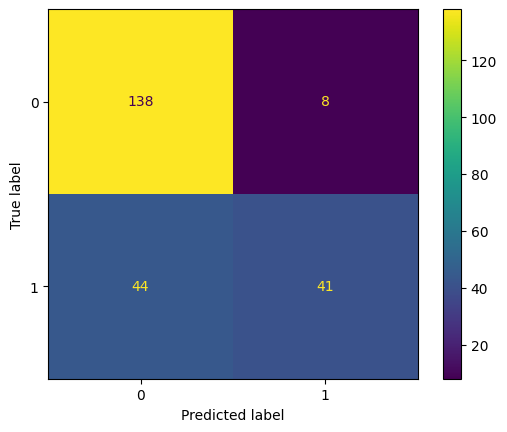

In [15]:
grid_SVC = gridSearch(SVC(),hyper_params,cv,"recall",X_train,y_train)
printModelEvaluation(y_test, grid_SVC.predict(X_test))

##### With Oversample training data

GCV best params:  {'C': 1.0}
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       146
           1       0.59      0.75      0.66        85

    accuracy                           0.72       231
   macro avg       0.71      0.73      0.71       231
weighted avg       0.74      0.72      0.72       231



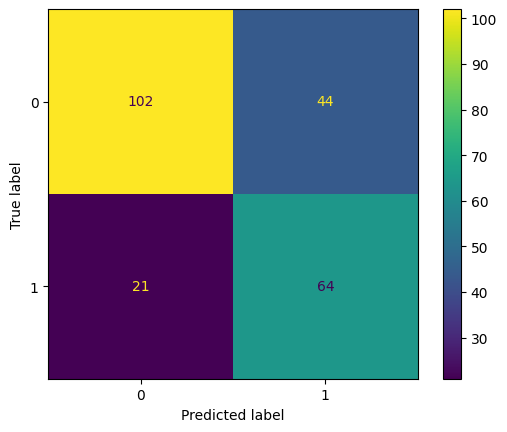

In [16]:
grid_SVC_Up = gridSearch(SVC(),hyper_params,cv,"recall",X_train_up,y_train_up)
printModelEvaluation(y_test, grid_SVC_Up.predict(X_test))

##### With Undersample training data

GCV best params:  {'C': 0.4}
              precision    recall  f1-score   support

           0       0.82      0.73      0.78       146
           1       0.61      0.73      0.67        85

    accuracy                           0.73       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.73      0.74       231



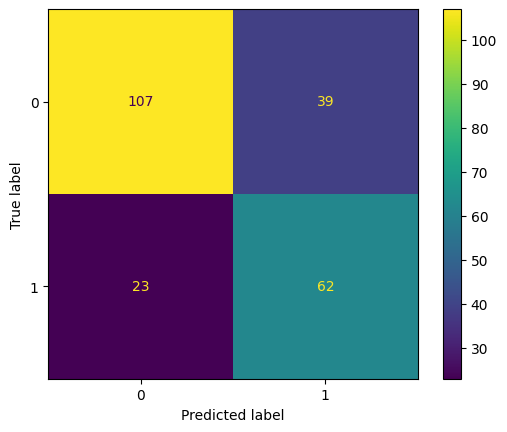

In [17]:
grid_SVC_Down = gridSearch(SVC(),hyper_params,cv,"recall",X_train_down,y_train_down)
printModelEvaluation(y_test, grid_SVC_Down.predict(X_test))

### 3.2 Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=None, min_samples_leaf=2) #default parameters: criterion="gini"
dtree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2)

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       146
           1       0.58      0.40      0.47        85

    accuracy                           0.67       231
   macro avg       0.64      0.61      0.62       231
weighted avg       0.66      0.67      0.65       231



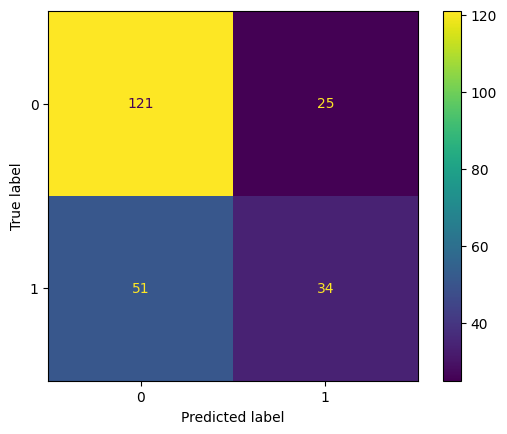

In [24]:
printModelEvaluation(y_test,dtree.predict(X_test))

#### Parameter tuning


In [26]:
from sklearn.tree import DecisionTreeClassifier
hyper_params={"min_samples_leaf": np.arange(2, 11, 1),"max_depth": np.arange(2, 16, 1),"criterion":["gini","entropy","log_loss"]}
cv = 10 # cross validation 10 

##### With training data

GCV best params:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 7}
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       146
           1       0.74      0.66      0.70        85

    accuracy                           0.79       231
   macro avg       0.77      0.76      0.77       231
weighted avg       0.78      0.79      0.79       231



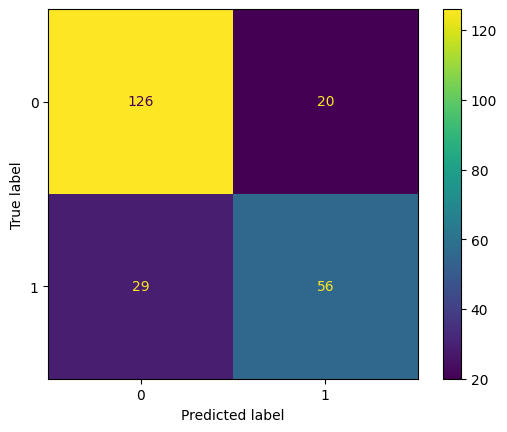

In [34]:
grid_dTree=gridSearch(DecisionTreeClassifier(),hyper_params,cv,"recall",X_train,y_train)
printModelEvaluation(y_test, grid_dTree.predict(X_test))

##### With Oversample training data

GCV best params:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3}
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       146
           1       0.57      0.60      0.59        85

    accuracy                           0.69       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.69      0.69      0.69       231



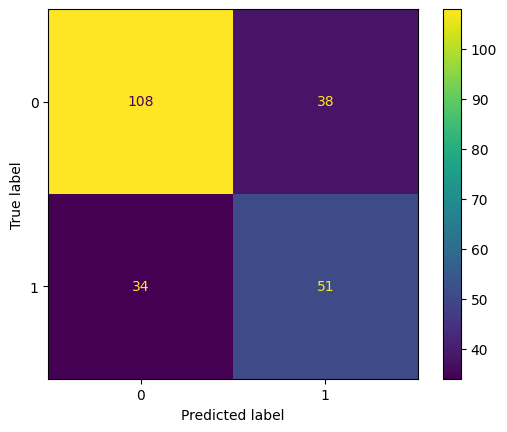

In [35]:
grid_dTree_Up=gridSearch(DecisionTreeClassifier(),hyper_params,cv,"recall",X_train_up,y_train_up)
printModelEvaluation(y_test, grid_dTree_Up.predict(X_test))

##### With Undersample training data

GCV best params:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5}
              precision    recall  f1-score   support

           0       0.85      0.53      0.66       146
           1       0.51      0.84      0.63        85

    accuracy                           0.65       231
   macro avg       0.68      0.68      0.64       231
weighted avg       0.72      0.65      0.65       231



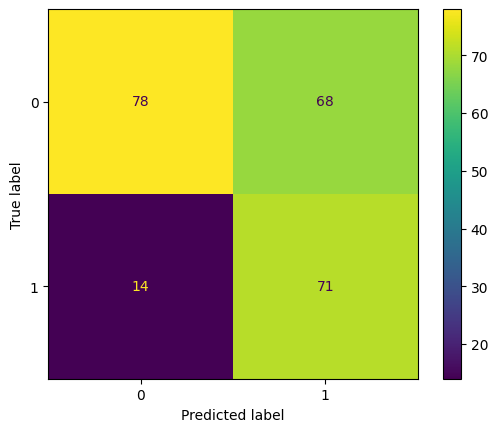

In [32]:
grid_dTree_Down=gridSearch(DecisionTreeClassifier(),hyper_params,cv,"recall",X_train_down,y_train_down)
printModelEvaluation(y_test, grid_dTree_Down.predict(X_test))

### 3.3 K-Nearest Neighbours

K-Nearest is a distance based algorithm which means it does take distance in consideration when learning a data set, K-Nearest tries to classify which data point belongs to which class, let’s say we have a finite number of data points on a graph from these finite number data points we have five data points near to each other which implies they have a-lot in common so hypothetically it’s safe to consider them a class and this what K-nearest tries to achieve to classify points to a class by clustering points similar to each other as a class.

In [36]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None) #default parameters 
neigh.fit(X_train, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.74      0.59      0.65        85

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



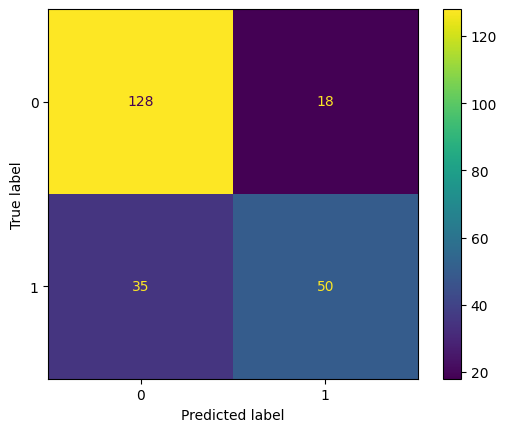

In [37]:
printModelEvaluation(y_test,neigh.predict(X_test))

#### Parameter tuning


In [39]:
hyper_params={"n_neighbors": np.arange(1, 31) ,"weights": ["uniform", "distance"],"leaf_size":(10, 20, 30, 40), "p": (1,2), "metric":["braycurtis", "minkowski", "chebyshev"]}
cv = 10 # cross validation 10 

##### With training data

GCV best params:  {'leaf_size': 10, 'metric': 'braycurtis', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       146
           1       0.76      0.60      0.67        85

    accuracy                           0.78       231
   macro avg       0.78      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231



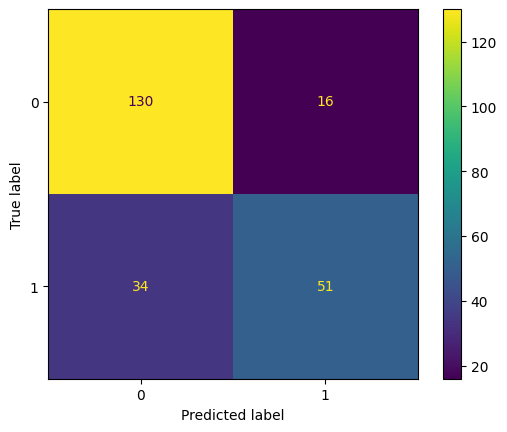

In [40]:
from sklearn.neighbors import KNeighborsClassifier
grid_neigh=gridSearch(KNeighborsClassifier(),hyper_params,cv,"recall",X_train,y_train)
printModelEvaluation(y_test, grid_neigh.predict(X_test))

##### With Oversample training data

GCV best params:  {'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 18, 'p': 2, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       146
           1       0.64      0.80      0.71        85

    accuracy                           0.76       231
   macro avg       0.75      0.77      0.75       231
weighted avg       0.78      0.76      0.77       231



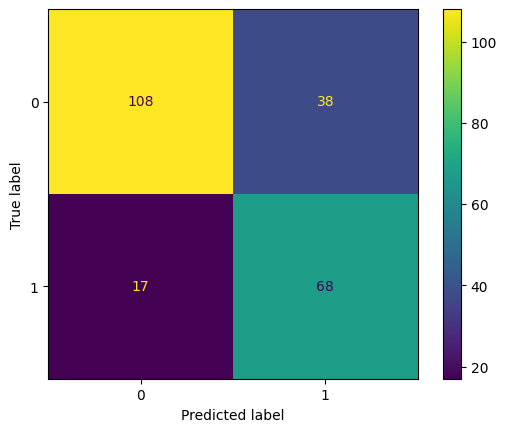

In [41]:
grid_neigh_Up=gridSearch(KNeighborsClassifier(),hyper_params,cv,"recall",X_train_up,y_train_up)
printModelEvaluation(y_test, grid_neigh_Up.predict(X_test))

##### With Undersample training data

GCV best params:  {'leaf_size': 10, 'metric': 'braycurtis', 'n_neighbors': 28, 'p': 1, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.86      0.74      0.79       146
           1       0.64      0.79      0.71        85

    accuracy                           0.76       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.78      0.76      0.76       231



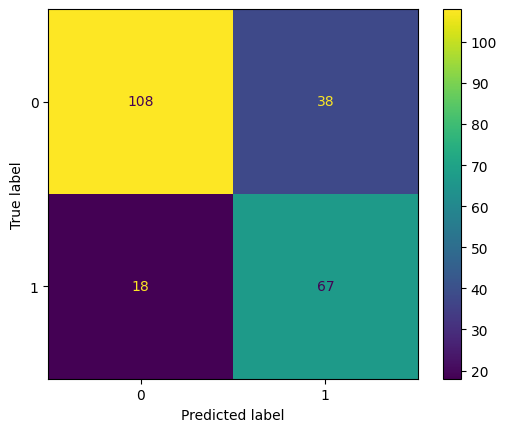

In [42]:
grid_neigh_Down=gridSearch(KNeighborsClassifier(),hyper_params,cv,"recall",X_train_down,y_train_down)
printModelEvaluation(y_test, grid_neigh_Down.predict(X_test))